In [1]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Import Datasets
cc_data_full_data = pd.read_csv('datasets/application_record.csv')      # Thông tin ứng viên
credit_status = pd.read_csv('datasets/credit_record.csv')               # Thông tin thẻ tín dụng

## Thông tin ứng viên

In [3]:
cc_data_full_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


## Thông tin thẻ tín dụng của ứng viên

In [4]:
credit_status.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


# KHAI PHÁ VÀ PHÂN TÍCH DỮ LIỆU

## Khởi tạo biến mục tiêu:
> Dựa trên điều kiện khách hàng quá hạn 60 ngày (được gán nhãn)

In [5]:
# Tính độ tuổi tài khoản của mỗi khách hàng
begin_month = pd.DataFrame(credit_status.groupby(['ID'])['MONTHS_BALANCE'].agg(min))
begin_month = begin_month.rename(columns={'MONTHS_BALANCE':'Account age'})
cc_data_full_data = pd.merge(cc_data_full_data, begin_month, how='left', on='ID')

# Xác định khách hàng có rủi ro tín dụng cao
credit_status['dep_value'] = None
credit_status['dep_value'][credit_status['STATUS'] == '2'] = 'Yes'
credit_status['dep_value'][credit_status['STATUS'] == '3'] = 'Yes'
credit_status['dep_value'][credit_status['STATUS'] == '4'] = 'Yes'
credit_status['dep_value'][credit_status['STATUS'] == '5'] = 'Yes'
cpunt = credit_status.groupby('ID').count()
cpunt['dep_value'][cpunt['dep_value'] > 0] = 'Yes'
cpunt['dep_value'][cpunt['dep_value'] == 0] = 'No'
cpunt = cpunt[['dep_value']]
cc_data_full_data = pd.merge(cc_data_full_data, cpunt, how='inner', on='ID')

# Cột mục tiêu "Is high risk"
cc_data_full_data['Is high risk'] = cc_data_full_data['dep_value']
cc_data_full_data.loc[cc_data_full_data['Is high risk']=='Yes','Is high risk'] = 1
cc_data_full_data.loc[cc_data_full_data['Is high risk']=='No','Is high risk'] = 0
cc_data_full_data.drop('dep_value', axis=1, inplace=True)
pd.options.mode.chained_assignment = None           # Ẩn cảnh báo

C:\Users\Admin\AppData\Local\Temp\ipykernel_17608\822578242.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  begin_month = pd.DataFrame(credit_status.groupby(['ID'])['MONTHS_BALANCE'].agg(min))
C:\Users\Admin\AppData\Local\Temp\ipykernel_17608\822578242.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] 

In [6]:
cc_data_full_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account age,Is high risk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0


In [7]:
# Đổi tên thuộc tính
cc_data_full_data = cc_data_full_data.rename(columns={
    'CODE_GENDER':'Gender',
    'FLAG_OWN_CAR':'Has a car',
    'FLAG_OWN_REALTY':'Has a property',
    'CNT_CHILDREN':'Children count',
    'AMT_INCOME_TOTAL':'Income',
    'NAME_INCOME_TYPE':'Employment status',
    'NAME_EDUCATION_TYPE':'Education level',
    'NAME_FAMILY_STATUS':'Marital status',
    'NAME_HOUSING_TYPE':'Dwelling',
    'DAYS_BIRTH':'Age',
    'DAYS_EMPLOYED': 'Employment length',
    'FLAG_MOBIL': 'Has a mobile phone',
    'FLAG_WORK_PHONE': 'Has a work phone',
    'FLAG_PHONE': 'Has a phone',
    'FLAG_EMAIL': 'Has an email',
    'OCCUPATION_TYPE': 'Job title',
    'CNT_FAM_MEMBERS': 'Family member count',
    'Account age': 'Account age'
    })

## Chuẩn bị dữ liệu huấn luyện mô hình:
> Sử dụng cc_data_full_data để chia ra làm 80% tập train và 20% tập test

In [8]:
# Library of Cython for split data
from cython_language import data_analysis

In [9]:
# Dữ liệu tập Train và tập Test
cc_train_original, cc_test_original = data_analysis.data_split(cc_data_full_data, 0.2)

In [10]:
# Xuất file.csv của tập train và tập test
cc_train_original.to_csv('datasets/train.csv', index = False)
cc_test_original.to_csv('datasets/test.csv', index = False)

In [11]:
# Sao chép dữ liệu train và test để làm việc
cc_train_copy = cc_train_original.copy()
cc_test_copy = cc_test_original.copy()

In [12]:
# Tổng quan dữ liệu
cc_data_full_data.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0


In [13]:
# Thông tin chi tiết bộ dữ liệu
cc_data_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   Gender               36457 non-null  object 
 2   Has a car            36457 non-null  object 
 3   Has a property       36457 non-null  object 
 4   Children count       36457 non-null  int64  
 5   Income               36457 non-null  float64
 6   Employment status    36457 non-null  object 
 7   Education level      36457 non-null  object 
 8   Marital status       36457 non-null  object 
 9   Dwelling             36457 non-null  object 
 10  Age                  36457 non-null  int64  
 11  Employment length    36457 non-null  int64  
 12  Has a mobile phone   36457 non-null  int64  
 13  Has a work phone     36457 non-null  int64  
 14  Has a phone          36457 non-null  int64  
 15  Has an email         36457 non-null 

In [14]:
# Cung cấp thông tin thống kê
cc_data_full_data.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,-26.164193
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,16.501854
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


# DATA PREPROCESSING

In [15]:
# Library for preprocessing data
from machine_learning.data_preprocessing import full_pipeline

In [16]:
pd.options.mode.chained_assignment = None           # Hide the warnings
cc_train_prep = full_pipeline(cc_train_copy)

e:\CreditCardApprovalPrediction\.myvenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
e:\CreditCardApprovalPrediction\.myvenv\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [17]:
# Show Preprocessing Data
pd.set_option('display.max_columns', None)
cc_train_prep.head()

,Gender_F,Gender_M,Marital status_Civil marriage,Marital status_Married,Marital status_Separated,Marital status_Single / not married,Marital status_Widow,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents,Employment status_Commercial associate,Employment status_Pensioner,Employment status_State servant,Employment status_Student,Employment status_Working,Has a car_N,Has a car_Y,Has a property_N,Has a property_Y,Has a work phone_N,Has a work phone_Y,Has a phone_N,Has a phone_Y,Has an email_N,Has an email_Y,Income,Education level,Age,Employment length,Family member count,Is high risk
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.417817,4.0,0.602718,0.273442,2.0,0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.417817,1.0,0.203417,0.144410,2.0,0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.519094,4.0,0.394044,0.498453,4.0,0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.806979,1.0,0.841939,0.179319,1.0,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.679378,4.0,0.599130,0.044012,1.0,0


In [18]:
# Extract the target variable "Is high risk" for training model
X_cc_train_prep, y_cc_train_prep = cc_train_prep.loc[:, cc_train_prep.columns != 'Is high risk'], cc_train_prep['Is high risk'].astype('int64')

In [19]:
# Xtrain for Model
X_cc_train_prep.head()

,Gender_F,Gender_M,Marital status_Civil marriage,Marital status_Married,Marital status_Separated,Marital status_Single / not married,Marital status_Widow,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents,Employment status_Commercial associate,Employment status_Pensioner,Employment status_State servant,Employment status_Student,Employment status_Working,Has a car_N,Has a car_Y,Has a property_N,Has a property_Y,Has a work phone_N,Has a work phone_Y,Has a phone_N,Has a phone_Y,Has an email_N,Has an email_Y,Income,Education level,Age,Employment length,Family member count
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.417817,4.0,0.602718,0.273442,2.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.417817,1.0,0.203417,0.144410,2.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.519094,4.0,0.394044,0.498453,4.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.806979,1.0,0.841939,0.179319,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.679378,4.0,0.599130,0.044012,1.0


In [20]:
# Ytrain for Model
y_cc_train_prep.head()

0    0
1    0
2    0
3    0
4    0
Name: Is high risk, dtype: int64

# TRAINING MODEL

In [21]:
# Library of Cython for getting models
from ensemble_learning import model_ensemble_learning
from ensemble_learning import model_predict_score
import warnings

In [22]:
# Dictionary for classifiers
classifiers = model_ensemble_learning.get_classifiers_dictionary()



----------------------  gradient_boosting  ----------------------


              precision    recall  f1-score   support

           0       0.90      0.91      0.90     23272
           1       0.90      0.90      0.90     23272

    accuracy                           0.90     46544
   macro avg       0.90      0.90      0.90     46544
weighted avg       0.90      0.90      0.90     46544



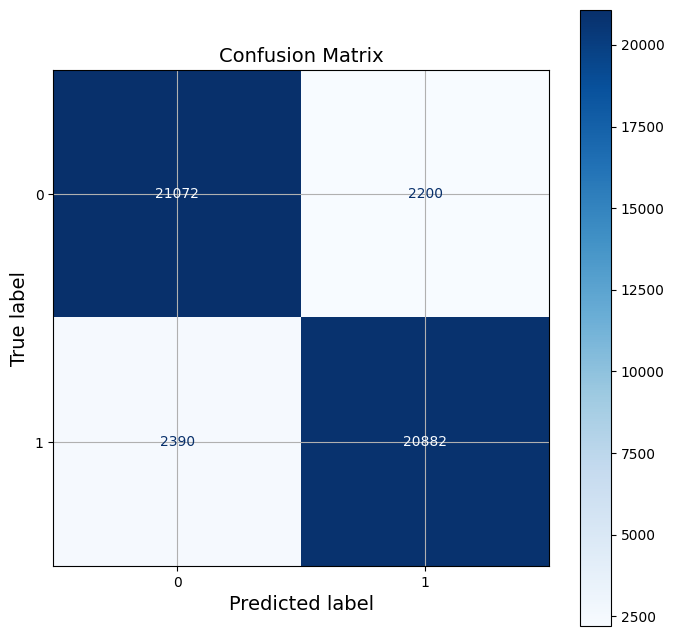





----------------------  bagging  ----------------------


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23272
           1       0.99      0.99      0.99     23272

    accuracy                           0.99     46544
   macro avg       0.99      0.99      0.99     46544
weighted avg       0.99      0.99      0.99     46544



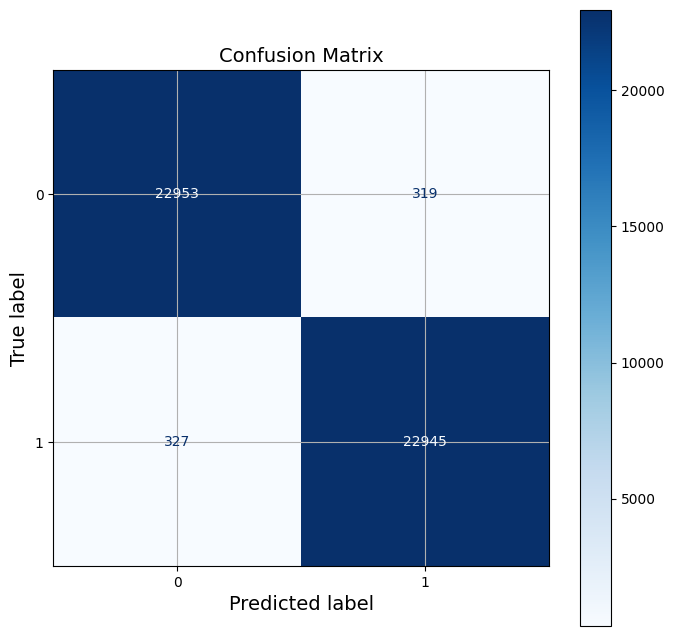





----------------------  logistic_regression  ----------------------


              precision    recall  f1-score   support

           0       0.59      0.56      0.58     23272
           1       0.58      0.61      0.59     23272

    accuracy                           0.59     46544
   macro avg       0.59      0.59      0.59     46544
weighted avg       0.59      0.59      0.59     46544



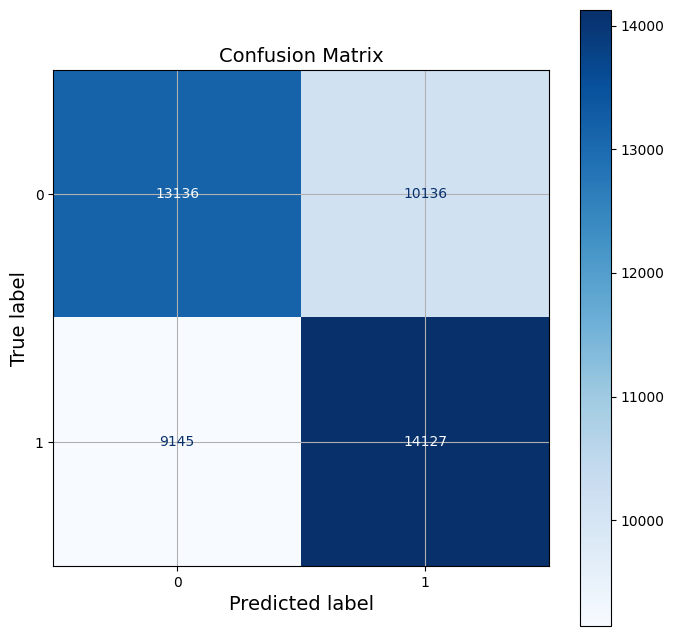





----------------------  decision_tree  ----------------------


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     23272
           1       0.98      0.98      0.98     23272

    accuracy                           0.98     46544
   macro avg       0.98      0.98      0.98     46544
weighted avg       0.98      0.98      0.98     46544



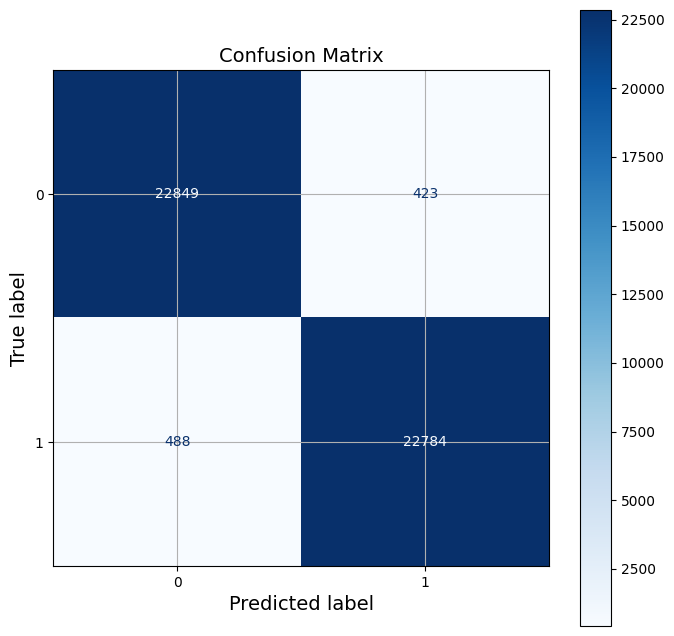





----------------------  random_forest  ----------------------


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23272
           1       0.99      0.99      0.99     23272

    accuracy                           0.99     46544
   macro avg       0.99      0.99      0.99     46544
weighted avg       0.99      0.99      0.99     46544



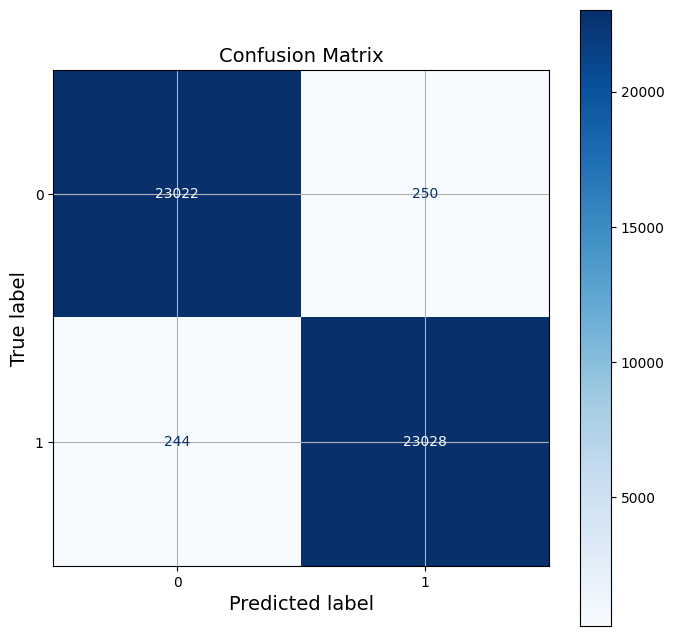





----------------------  extra_trees  ----------------------


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23272
           1       0.99      0.99      0.99     23272

    accuracy                           0.99     46544
   macro avg       0.99      0.99      0.99     46544
weighted avg       0.99      0.99      0.99     46544



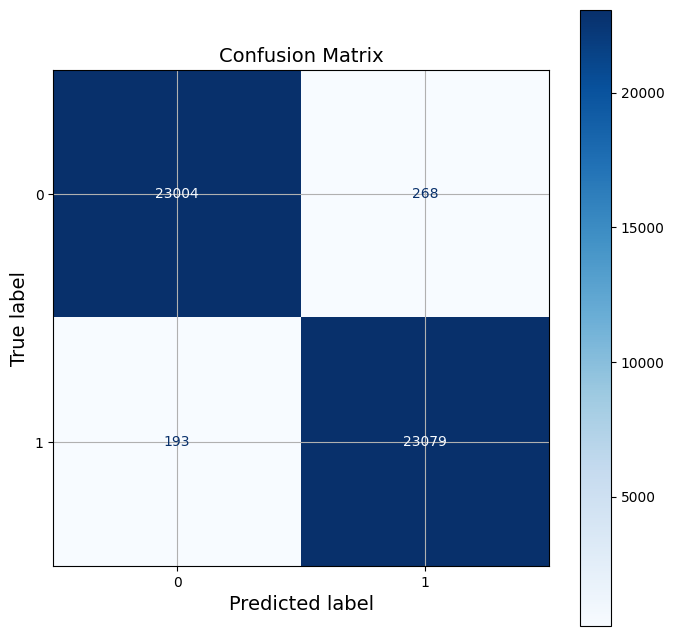





----------------------  stacking  ----------------------


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23272
           1       0.99      0.99      0.99     23272

    accuracy                           0.99     46544
   macro avg       0.99      0.99      0.99     46544
weighted avg       0.99      0.99      0.99     46544



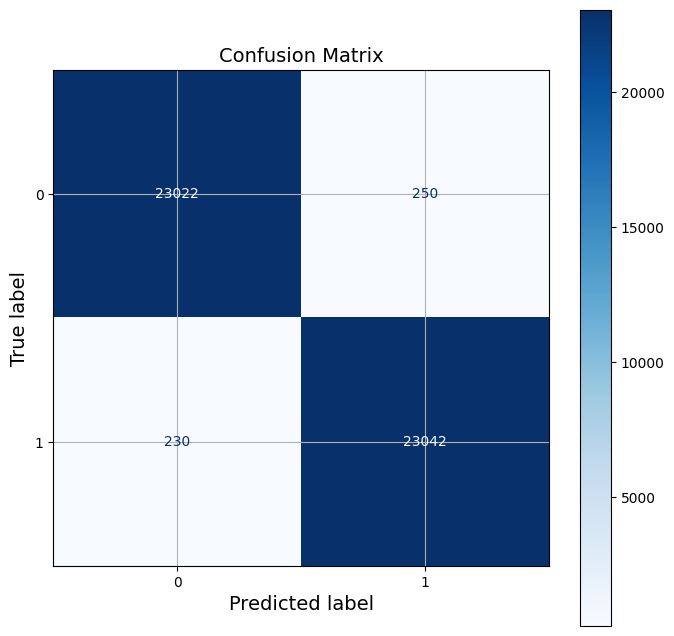





----------------------  stacking_test  ----------------------


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23272
           1       0.99      0.99      0.99     23272

    accuracy                           0.99     46544
   macro avg       0.99      0.99      0.99     46544
weighted avg       0.99      0.99      0.99     46544



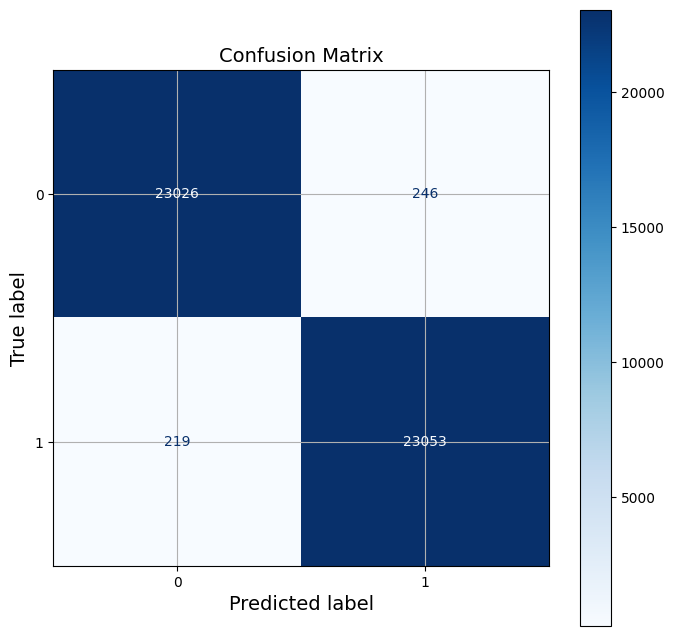

In [23]:
for model_name, model in classifiers.items():
    print('\n')
    print('  {}  '.center(50,'-').format(model_name))
    print('\n')
    model_ensemble_learning.folder_check_model(model_name)

    # Training the model
    model_trn = model_predict_score.train_model(model, model_name, X_cc_train_prep, y_cc_train_prep)
    model_predict_score.score_func(model_trn, model_name, X_cc_train_prep, y_cc_train_prep)
    model_predict_score.confusion_matrix_func(model_trn, model_name, X_cc_train_prep, y_cc_train_prep)
    warnings.filterwarnings("ignore")

# MODEL SELECTION

In [24]:
cc_test_copy.head(5)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


In [25]:
# Testing preprocessing data 
cc_test_prep = full_pipeline(cc_test_copy)
print(cc_test_prep)

       Gender_F  Gender_M  Marital status_Civil marriage  \
0           1.0       0.0                            0.0   
1           1.0       0.0                            1.0   
2           1.0       0.0                            0.0   
3           1.0       0.0                            0.0   
4           1.0       0.0                            0.0   
...         ...       ...                            ...   
11649       1.0       0.0                            0.0   
11650       1.0       0.0                            0.0   
11651       1.0       0.0                            0.0   
11652       0.0       1.0                            1.0   
11653       0.0       1.0                            0.0   

       Marital status_Married  Marital status_Separated  \
0                         0.0                  1.000000   
1                         0.0                  0.000000   
2                         1.0                  0.000000   
3                         1.0              

In [26]:
# Split the train data into X and y (target)
X_cc_test_prep, y_cc_test_prep = cc_test_prep.loc[:, cc_test_prep.columns != 'Is high risk'], cc_test_prep['Is high risk'].astype('int64')

In [27]:
# Train the model (Ensemble Learning Classifier)
model_trn1 = model_predict_score.train_model(classifiers['gradient_boosting'], 'gradient_boosting', X_cc_test_prep, y_cc_test_prep)
model_trn2 = model_predict_score.train_model(classifiers['bagging'], 'bagging', X_cc_test_prep, y_cc_test_prep)
model_trn3 = model_predict_score.train_model(classifiers['logistic_regression'], 'logistic_regression', X_cc_test_prep, y_cc_test_prep)
model_trn4 = model_predict_score.train_model(classifiers['decision_tree'], 'decision_tree', X_cc_test_prep, y_cc_test_prep)
model_trn5 = model_predict_score.train_model(classifiers['random_forest'], 'random_forest', X_cc_test_prep, y_cc_test_prep)
model_trn6 = model_predict_score.train_model(classifiers['extra_trees'], 'extra_trees', X_cc_test_prep, y_cc_test_prep)
model_trn7 = model_predict_score.train_model(classifiers['stacking'], 'stacking', X_cc_test_prep, y_cc_test_prep)
model_test = model_predict_score.train_model(classifiers['stacking_test'], 'stacking_test', X_cc_test_prep, y_cc_test_prep)

In [28]:
# Predict the model 
final_predictions1 = model_trn1.predict(X_cc_test_prep)
final_predictions2 = model_trn2.predict(X_cc_test_prep)
final_predictions3 = model_trn3.predict(X_cc_test_prep)
final_predictions4 = model_trn5.predict(X_cc_test_prep)
final_predictions5 = model_trn5.predict(X_cc_test_prep)
final_predictions6 = model_trn6.predict(X_cc_test_prep)
final_predictions7 = model_trn7.predict(X_cc_test_prep)
final_predictions_test = model_test.predict(X_cc_test_prep)

In [29]:
# Compare the predictions and actual target values for Boosting
n_correct1 = sum(final_predictions1 == y_cc_test_prep)
print("Accuracy Boosting =", n_correct1/len(final_predictions1))

# Compare the predictions and actual target values for Bagging
n_correct2 = sum(final_predictions2 == y_cc_test_prep)
print("Accuracy Bagging =", n_correct2/len(final_predictions2))

# Compare the predictions and actual target values for Logistic Regression
n_correct3 = sum(final_predictions3 == y_cc_test_prep)
print("Accuracy Logistic Regression =", n_correct3/len(final_predictions3))

# Compare the predictions and actual target values for Decision Tree
n_correct4 = sum(final_predictions4 == y_cc_test_prep)
print("Accuracy Decision Tree =", n_correct4/len(final_predictions4))

# Compare the predictions and actual target values for Random Forest
n_correct5 = sum(final_predictions5 == y_cc_test_prep)
print("Accuracy Random Forest =", n_correct5/len(final_predictions5))

# Compare the predictions and actual target values for ExtraTrees
n_correct6 = sum(final_predictions6 == y_cc_test_prep)
print("Accuracy ExtraTrees =", n_correct6/len(final_predictions6))

# Compare the predictions and actual target values for Stacking Classifier
n_correct7 = sum(final_predictions7 == y_cc_test_prep)
print("Accuracy Stacking Classifier =", n_correct7/len(final_predictions7))

# Stacking Classifier for Testing
n_correct_test = sum(final_predictions_test == y_cc_test_prep)
print("Accuracy Gradient Stacking Classifier =", n_correct_test/len(final_predictions_test))

Accuracy Boosting = 0.8732623991762485
Accuracy Bagging = 0.8365368113952291
Accuracy Logistic Regression = 0.5435043761798524
Accuracy Decision Tree = 0.8863051312853956
Accuracy Random Forest = 0.8863051312853956
Accuracy ExtraTrees = 0.8665694182255019
Accuracy Stacking Classifier = 0.8812424918482924
Accuracy Gradient Stacking Classifier = 0.8977175218808993
